# Snow Analysis - Detailed Analysis

This notebook performs detailed analysis on snow data from '41...' files:
- **df_snow**: Processed data from 417*.csv files (4177732.csv, 4177747.csv)

**Focus Areas:**
- Snow accumulation analysis
- Rain date accumulation and events
- Precipitation analysis
- Time series analysis
- Station comparisons


## 1. Setup & Load Data


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Plotting setup
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports complete")


✓ Imports complete


In [34]:
# Load processed dataframe
DATA_DIR = Path('../../data/noaa_asos/snow')

# Load the processed snow data file
df_snow_file = DATA_DIR / 'snow_data_processed.csv'

if df_snow_file.exists():
    df_snow = pd.read_csv(df_snow_file)
    df_snow['DATE'] = pd.to_datetime(df_snow['DATE'])
    print(f"✓ Loaded df_snow: {len(df_snow):,} rows")
    print(f"  Date range: {df_snow['DATE'].min().date()} to {df_snow['DATE'].max().date()}")
    print(f"  Stations: {', '.join(sorted(df_snow['station_code'].dropna().unique()))}")
    print(f"  Columns: {', '.join(df_snow.columns[:10])}...")
else:
    print("⚠ df_snow file not found. Please run snow_data_processing.ipynb first.")
    df_snow = None

print(f"\n{'='*60}")
print("DATA LOADED")
print(f"{'='*60}")


✓ Loaded df_snow: 3,126 rows
  Date range: 2023-01-01 to 2025-11-27
  Stations: KJFK, KLGA, KNYC
  Columns: DATE, station_code, PRCP, SNOW, SNWD, TMAX, TMIN, TAVG, AWND, WSF2...

DATA LOADED


## 2. Data Overview

Review the loaded dataset and date ranges


In [35]:
# Data overview for each station
if df_snow is not None:
    print("="*60)
    print("DATA OVERVIEW")
    print("="*60)
    
    # Station configurations
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    overview_summary = []
    
    for station in ['KJFK', 'KLGA', 'KNYC']:
        station_data = df_snow[df_snow['station_code'] == station]
        
        if len(station_data) > 0:
            dates = station_data['DATE'].dt.date
            min_date = station_data['DATE'].min().date()
            max_date = station_data['DATE'].max().date()
            unique_dates = len(dates.unique())
            
            # Count rain days if column exists
            rain_days = station_data['is_rain_day'].sum() if 'is_rain_day' in station_data.columns else 0
            
            print(f"\n{station} ({STATION_CODES.get(station, station)}):")
            print(f"  Date range: {min_date} to {max_date}")
            print(f"  Total records: {len(station_data):,}")
            print(f"  Unique dates: {unique_dates:,} days")
            print(f"  Rain days: {rain_days:,}")
            
            if 'PRCP' in station_data.columns:
                total_prcp = station_data['PRCP'].sum()
                max_prcp = station_data['PRCP'].max()
                print(f"  Total precipitation: {total_prcp:.2f} mm")
                print(f"  Max daily precipitation: {max_prcp:.2f} mm")
            
            overview_summary.append({
                'station': station,
                'records': len(station_data),
                'unique_dates': unique_dates,
                'min_date': min_date,
                'max_date': max_date,
                'rain_days': rain_days
            })
    
    overview_df = pd.DataFrame(overview_summary)
    print(f"\n{'='*60}")
    print("SUMMARY TABLE")
    print(f"{'='*60}")
    print(overview_df)
    
else:
    print("df_snow not available")


DATA OVERVIEW

KJFK (JFK Airport):
  Date range: 2023-01-31 to 2025-11-27
  Total records: 1,032
  Unique dates: 1,032 days
  Rain days: 344
  Total precipitation: 2983.23 mm
  Max daily precipitation: 204.47 mm

KLGA (LaGuardia Airport):
  Date range: 2023-01-01 to 2025-11-27
  Total records: 1,062
  Unique dates: 1,062 days
  Rain days: 352
  Total precipitation: 3511.55 mm
  Max daily precipitation: 104.14 mm

KNYC (Central Park):
  Date range: 2023-01-31 to 2025-11-27
  Total records: 1,032
  Unique dates: 1,032 days
  Rain days: 343
  Total precipitation: 3490.47 mm
  Max daily precipitation: 139.19 mm

SUMMARY TABLE
  station  records  unique_dates    min_date    max_date  rain_days
0    KJFK     1032          1032  2023-01-31  2025-11-27        344
1    KLGA     1062          1062  2023-01-01  2025-11-27        352
2    KNYC     1032          1032  2023-01-31  2025-11-27        343


## 3. Data Ready for Analysis

The dataframe is ready - no intersection needed since we have a single unified dataset.


In [36]:
# Use df_snow directly - it's already processed and ready
if df_snow is not None:
    print("="*60)
    print("DATA READY FOR ANALYSIS")
    print("="*60)
    
    # Sort by date and station for consistency
    df_snow = df_snow.sort_values(['station_code', 'DATE']).reset_index(drop=True)
    
    print(f"\n✓ Using df_snow dataframe:")
    print(f"  Total rows: {len(df_snow):,}")
    print(f"  Columns: {len(df_snow.columns)}")
    print(f"  Date range: {df_snow['DATE'].min().date()} to {df_snow['DATE'].max().date()}")
    print(f"  Stations: {', '.join(sorted(df_snow['station_code'].dropna().unique()))}")
    
    # Show column names
    print(f"\nColumns in dataframe:")
    print(f"  {', '.join(df_snow.columns)}")
    
    # Show preview
    print(f"\nPreview (first 5 rows):")
    print(df_snow.head())
    
else:
    print("df_snow not available")


DATA READY FOR ANALYSIS

✓ Using df_snow dataframe:
  Total rows: 3,126
  Columns: 18
  Date range: 2023-01-01 to 2025-11-27
  Stations: KJFK, KLGA, KNYC

Columns in dataframe:
  DATE, station_code, PRCP, SNOW, SNWD, TMAX, TMIN, TAVG, AWND, WSF2, WSF5, WDF2, WDF5, STATION, NAME, is_rain_day, PRCP_cumulative, rain_event

Preview (first 5 rows):
        DATE station_code   PRCP  SNOW  SNWD  TMAX  TMIN  TAVG   AWND  WSF2  \
0 2023-01-31         KJFK  0.762  0.00   0.0  45.0  31.0  39.0  10.29  21.0   
1 2023-02-01         KJFK  0.508  5.08   0.0  38.0  26.0  32.0  10.51  16.1   
2 2023-02-02         KJFK  0.000  0.00   0.0  39.0  24.0  32.0  10.29  23.0   
3 2023-02-03         KJFK  0.000  0.00   0.0  35.0  11.0  29.0  25.72  42.9   
4 2023-02-04         KJFK  0.000  0.00   0.0  27.0   4.0  12.0  17.00  36.9   

   WSF5   WDF2   WDF5      STATION                              NAME  \
0  25.9  350.0  350.0  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   
1  19.0   30.0  320.0  USW00094789 

## 4. Snow Accumulation Analysis


In [37]:
# Calculate snow accumulation from df_snow
if df_snow is not None:
    print("="*60)
    print("SNOW ACCUMULATION ANALYSIS")
    print("="*60)
    
    # Station names
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    # Calculate cumulative snow accumulation per station
    snow_accum = df_snow.copy()
    snow_accum = snow_accum.sort_values(['station_code', 'DATE'])
    
    # Calculate cumulative sum per station (reset at each station)
    if 'SNOW' in snow_accum.columns:
        snow_accum['snow_accumulated'] = snow_accum.groupby('station_code')['SNOW'].cumsum()
    
    # Find periods with snow accumulation
    for station in sorted(snow_accum['station_code'].unique()):
        station_data = snow_accum[snow_accum['station_code'] == station]
        
        if 'SNOW' in station_data.columns:
            # Days with snow
            days_with_snow = (station_data['SNOW'] > 0).sum()
            total_snow = station_data['SNOW'].sum()
            max_snow_day = station_data.loc[station_data['SNOW'].idxmax(), 'DATE'] if days_with_snow > 0 else None
            max_snow_amount = station_data['SNOW'].max()
            
            print(f"\n{station} ({STATION_CODES.get(station, station)}):")
            print(f"  Total snow accumulation: {total_snow:.2f} mm")
            print(f"  Days with snow: {days_with_snow}")
            print(f"  Max snow in one day: {max_snow_amount:.2f} mm" + (f" (on {max_snow_day.date()})" if max_snow_day else ""))
            
            # Find longest snow accumulation period
            if days_with_snow > 0:
                station_data_with_snow = station_data[station_data['SNOW'] > 0].copy()
                station_data_with_snow['date_diff'] = station_data_with_snow['DATE'].diff().dt.days
                station_data_with_snow['snow_period'] = (station_data_with_snow['date_diff'] > 1).cumsum()
                
                max_period_size = station_data_with_snow.groupby('snow_period').size().max()
                print(f"  Longest continuous snow period: {max_period_size} days")
    
    print(f"\n✓ Snow accumulation calculated")
    
else:
    print("df_snow not available")


SNOW ACCUMULATION ANALYSIS

KJFK (JFK Airport):
  Total snow accumulation: 683.26 mm
  Days with snow: 23
  Max snow in one day: 157.48 mm (on 2024-02-17)
  Longest continuous snow period: 2 days

KLGA (LaGuardia Airport):
  Total snow accumulation: 723.90 mm
  Days with snow: 22
  Max snow in one day: 91.44 mm (on 2025-01-19)
  Longest continuous snow period: 2 days

KNYC (Central Park):
  Total snow accumulation: 576.58 mm
  Days with snow: 23
  Max snow in one day: 81.28 mm (on 2024-02-13)
  Longest continuous snow period: 2 days

✓ Snow accumulation calculated


In [38]:
# Rain accumulation analysis (using rain_event from processing)
if df_snow is not None and 'rain_event' in df_snow.columns:
    print("="*60)
    print("RAIN EVENT ANALYSIS")
    print("="*60)
    
    # Station names
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    for station in sorted(df_snow['station_code'].unique()):
        station_data = df_snow[df_snow['station_code'] == station]
        rain_events = station_data[station_data['rain_event'] > 0]['rain_event'].unique()
        
        print(f"\n{station} ({STATION_CODES.get(station, station)}):")
        print(f"  Total rain events: {len(rain_events)}")
        print(f"  Total rain days: {station_data['is_rain_day'].sum()}")
        
        # Calculate stats per rain event
        if len(rain_events) > 0:
            event_durations = []
            event_totals = []
            for event_id in rain_events:
                event_data = station_data[station_data['rain_event'] == event_id]
                event_durations.append(len(event_data))
                event_totals.append(event_data['PRCP'].sum())
            
            if event_durations:
                print(f"  Average event duration: {np.mean(event_durations):.1f} days")
                print(f"  Longest event: {max(event_durations)} days")
                print(f"  Average event total: {np.mean(event_totals):.2f} mm")
                print(f"  Largest event total: {max(event_totals):.2f} mm")
    
    print(f"\n✓ Rain event analysis complete")
else:
    print("Rain event data not available in df_snow")


RAIN EVENT ANALYSIS

KJFK (JFK Airport):
  Total rain events: 178
  Total rain days: 344
  Average event duration: 1.9 days
  Longest event: 12 days
  Average event total: 16.76 mm
  Largest event total: 225.81 mm

KLGA (LaGuardia Airport):
  Total rain events: 192
  Total rain days: 352
  Average event duration: 1.8 days
  Longest event: 7 days
  Average event total: 18.29 mm
  Largest event total: 152.65 mm

KNYC (Central Park):
  Total rain events: 184
  Total rain days: 343
  Average event duration: 1.9 days
  Longest event: 7 days
  Average event total: 18.97 mm
  Largest event total: 149.86 mm

✓ Rain event analysis complete


In [39]:
# This cell was removed - no comparison needed with single dataset


## 5. Monthly & Seasonal Snow Analysis


In [40]:
# Monthly snow totals and analysis
if df_snow is not None:
    print("="*60)
    print("MONTHLY SNOW ANALYSIS")
    print("="*60)
    
    df_monthly = df_snow.copy()
    df_monthly['year'] = df_monthly['DATE'].dt.year
    df_monthly['month'] = df_monthly['DATE'].dt.month
    df_monthly['month_name'] = df_monthly['DATE'].dt.strftime('%B')
    
    # Monthly aggregates - use available columns
    agg_dict = {}
    if 'SNOW' in df_monthly.columns:
        agg_dict['SNOW'] = 'sum'
    if 'SNWD' in df_monthly.columns:
        agg_dict['SNWD'] = 'mean'
    if 'PRCP' in df_monthly.columns:
        agg_dict['PRCP'] = 'sum'
    if 'TMAX' in df_monthly.columns:
        agg_dict['TMAX'] = 'mean'
    if 'TMIN' in df_monthly.columns:
        agg_dict['TMIN'] = 'mean'
    
    monthly_snow = df_monthly.groupby(['year', 'month', 'month_name', 'station_code']).agg(agg_dict).reset_index()
    
    
    print(f"\nMonthly aggregates calculated: {len(monthly_snow):,} records")
    
    # Find snowiest months
    if 'SNOW' in monthly_snow.columns:
        print(f"\nSnowiest Months:")
        for station in sorted(monthly_snow['station_code'].unique()):
            station_monthly = monthly_snow[monthly_snow['station_code'] == station]
            snowiest = station_monthly.nlargest(5, 'SNOW')[['year', 'month_name', 'SNOW']]
            print(f"\n  {station}:")
            for idx, row in snowiest.iterrows():
                print(f"    {row['month_name']} {int(row['year'])}: {row['SNOW']:.1f} mm")
    
    print(f"\n✓ Monthly analysis complete")
    
else:
    print("df_snow not available")


MONTHLY SNOW ANALYSIS

Monthly aggregates calculated: 105 records

Snowiest Months:

  KJFK:
    February 2024: 264.2 mm
    February 2025: 165.1 mm
    December 2024: 76.2 mm
    January 2025: 63.5 mm
    January 2024: 61.0 mm

  KLGA:
    February 2025: 195.6 mm
    February 2024: 167.6 mm
    January 2025: 104.1 mm
    January 2024: 99.1 mm
    December 2024: 81.3 mm

  KNYC:
    February 2025: 180.3 mm
    February 2024: 132.1 mm
    January 2025: 76.2 mm
    December 2024: 71.1 mm
    January 2024: 58.4 mm

✓ Monthly analysis complete


In [41]:
# Seasonal analysis (winter months: Dec, Jan, Feb)
if df_snow is not None:
    print("="*60)
    print("SEASONAL SNOW ANALYSIS (Winter: Dec-Jan-Feb)")
    print("="*60)
    
    # Station names
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    df_seasonal = df_snow.copy()
    df_seasonal['year'] = df_seasonal['DATE'].dt.year
    df_seasonal['month'] = df_seasonal['DATE'].dt.month
    
    # Create winter season identifier (Dec of year N, Jan-Feb of year N+1 = winter N+1)
    df_seasonal['winter_year'] = df_seasonal['year']
    df_seasonal.loc[df_seasonal['month'] == 12, 'winter_year'] = df_seasonal.loc[df_seasonal['month'] == 12, 'year'] + 1
    
    # Filter winter months
    winter_months = df_seasonal[df_seasonal['month'].isin([12, 1, 2])]
    
    # Aggregate by winter season - use available columns
    agg_dict = {}
    if 'SNOW' in winter_months.columns:
        agg_dict['SNOW'] = 'sum'
    if 'SNWD' in winter_months.columns:
        agg_dict['SNWD'] = 'mean'
    if 'PRCP' in winter_months.columns:
        agg_dict['PRCP'] = 'sum'
    
    winter_totals = winter_months.groupby(['winter_year', 'station_code']).agg(agg_dict).reset_index()
    
    print(f"\nWinter season totals calculated: {len(winter_totals):,} seasons")
    
    # Show by station
    for station in sorted(winter_totals['station_code'].unique()):
        station_winter = winter_totals[winter_totals['station_code'] == station].sort_values('winter_year')
        print(f"\n{station} ({STATION_CODES.get(station, station)}) - Winter Totals:")
        if 'SNOW' in station_winter.columns and 'PRCP' in station_winter.columns:
            print(f"  {'Year':<8} {'Snow (mm)':<15} {'Precip (mm)':<15}")
            print(f"  {'-'*40}")
            for idx, row in station_winter.iterrows():
                snow_val = row['SNOW'] if 'SNOW' in row else 0
                prcp_val = row['PRCP'] if 'PRCP' in row else 0
                print(f"  {int(row['winter_year']):<8} {snow_val:<15.1f} {prcp_val:<15.1f}")
    
    print(f"\n✓ Seasonal analysis complete")
    
else:
    print("df_snow not available")


SEASONAL SNOW ANALYSIS (Winter: Dec-Jan-Feb)

Winter season totals calculated: 9 seasons

KJFK (JFK Airport) - Winter Totals:
  Year     Snow (mm)       Precip (mm)    
  ----------------------------------------
  2023     43.2            39.9           
  2024     325.1           384.8          
  2025     304.8           209.8          

KLGA (LaGuardia Airport) - Winter Totals:
  Year     Snow (mm)       Precip (mm)    
  ----------------------------------------
  2023     73.7            152.7          
  2024     266.7           365.8          
  2025     381.0           208.0          

KNYC (Central Park) - Winter Totals:
  Year     Snow (mm)       Precip (mm)    
  ----------------------------------------
  2023     55.9            34.0           
  2024     190.5           356.6          
  2025     327.7           196.6          

✓ Seasonal analysis complete


## 6. Station Comparison


In [42]:
# Compare snow totals across all three stations
if df_snow is not None:
    print("="*60)
    print("STATION COMPARISON")
    print("="*60)
    
    # Station names
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    # Overall totals by station
    agg_dict = {}
    if 'SNOW' in df_snow.columns:
        agg_dict['SNOW'] = ['sum', 'mean', 'max', 'count']
    if 'PRCP' in df_snow.columns:
        agg_dict['PRCP'] = ['sum', 'mean', 'max']
    
    station_totals = df_snow.groupby('station_code').agg(agg_dict).round(2)
    
    print("\nTotal Snow by Station:")
    print(f"{'Station':<8} {'Snow Total (mm)':<18} {'Precip Total (mm)':<20} {'Days':<8}")
    print("-" * 60)
    for station in ['KJFK', 'KLGA', 'KNYC']:
        if station in station_totals.index:
            snow_total = station_totals.loc[station, ('SNOW', 'sum')] if 'SNOW' in station_totals.columns.get_level_values(0) else 0
            prcp_total = station_totals.loc[station, ('PRCP', 'sum')] if 'PRCP' in station_totals.columns.get_level_values(0) else 0
            days = station_totals.loc[station, ('SNOW', 'count')] if 'SNOW' in station_totals.columns.get_level_values(0) else 0
            print(f"{station:<8} {snow_total:<18.1f} {prcp_total:<20.1f} {int(days):<8}")
    
    print(f"\n✓ Station comparison complete")
    
else:
    print("df_snow not available")


STATION COMPARISON

Total Snow by Station:
Station  Snow Total (mm)    Precip Total (mm)    Days    
------------------------------------------------------------
KJFK     683.3              2983.2               1003    
KLGA     723.9              3511.6               1061    
KNYC     576.6              3490.5               1032    

✓ Station comparison complete


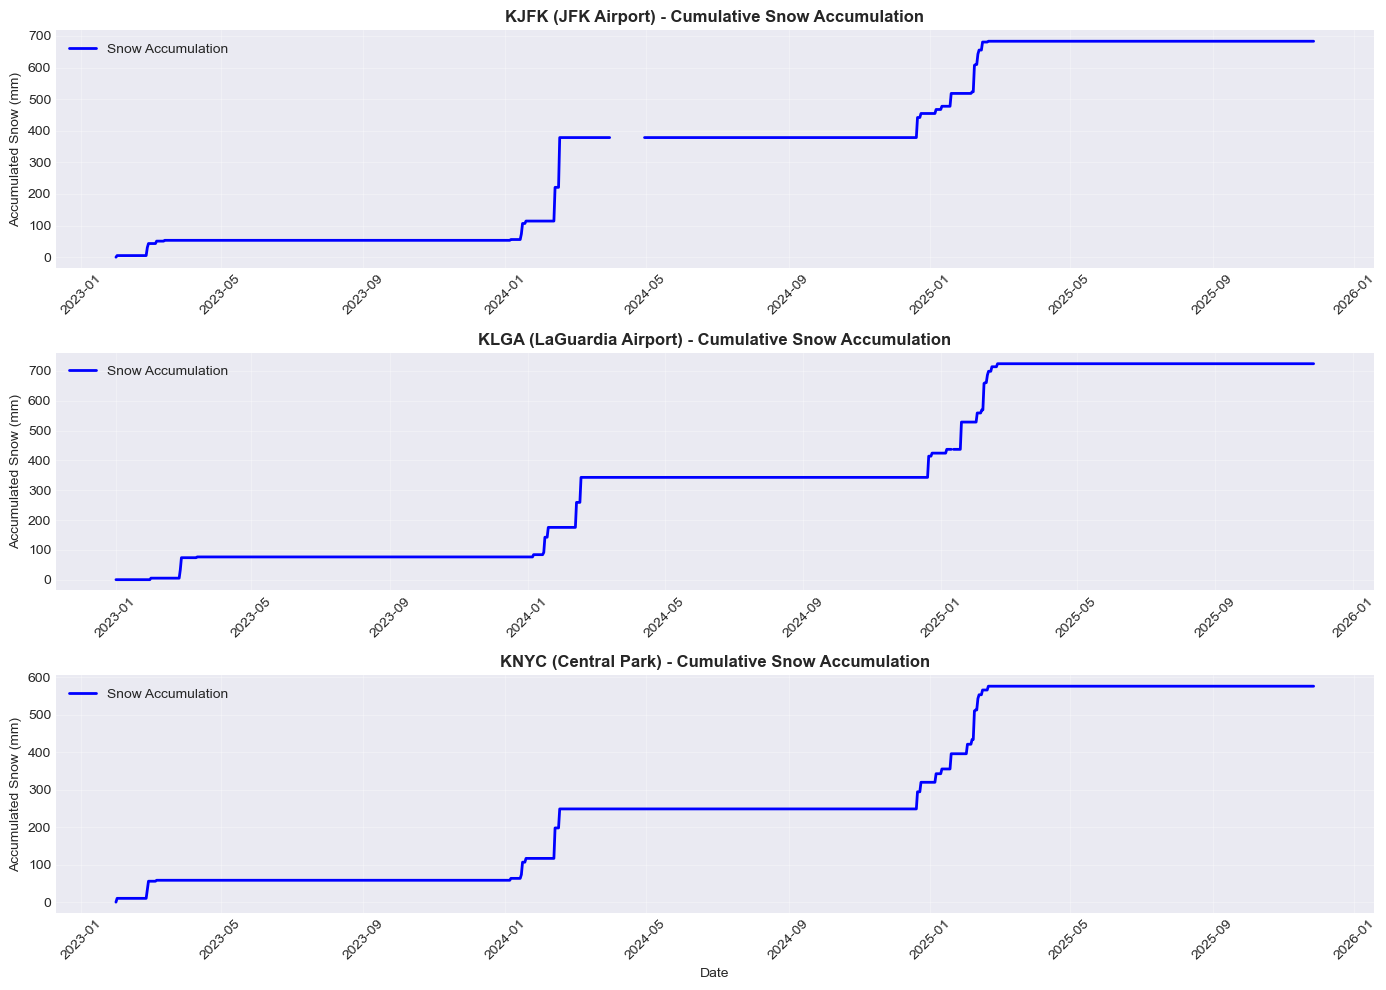

✓ Accumulation plots created


In [43]:
# Snow Accumulation Plots
if df_snow is not None and 'SNOW' in df_snow.columns:
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    stations = ['KJFK', 'KLGA', 'KNYC']
    
    # Plot: Cumulative snow accumulation by station
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    
    for idx, station in enumerate(stations):
        df_station = df_snow[df_snow['station_code'] == station].sort_values('DATE')
        
        # Compute cumulative sum
        snow_accum = df_station['SNOW'].cumsum()
        dates = df_station['DATE']
        
        axes[idx].plot(dates, snow_accum, label='Snow Accumulation', linewidth=2, color='blue')
        axes[idx].set_title(f'{station} ({STATION_CODES.get(station, station)}) - Cumulative Snow Accumulation', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Accumulated Snow (mm)', fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend(loc='upper left')
        axes[idx].tick_params(axis='x', rotation=45)
    
    axes[-1].set_xlabel('Date', fontsize=10)
    plt.tight_layout()
    plt.show()
    
    print("✓ Accumulation plots created")
else:
    print("df_snow not available for accumulation plots")


## 8. Visualization: Accumulation Plots


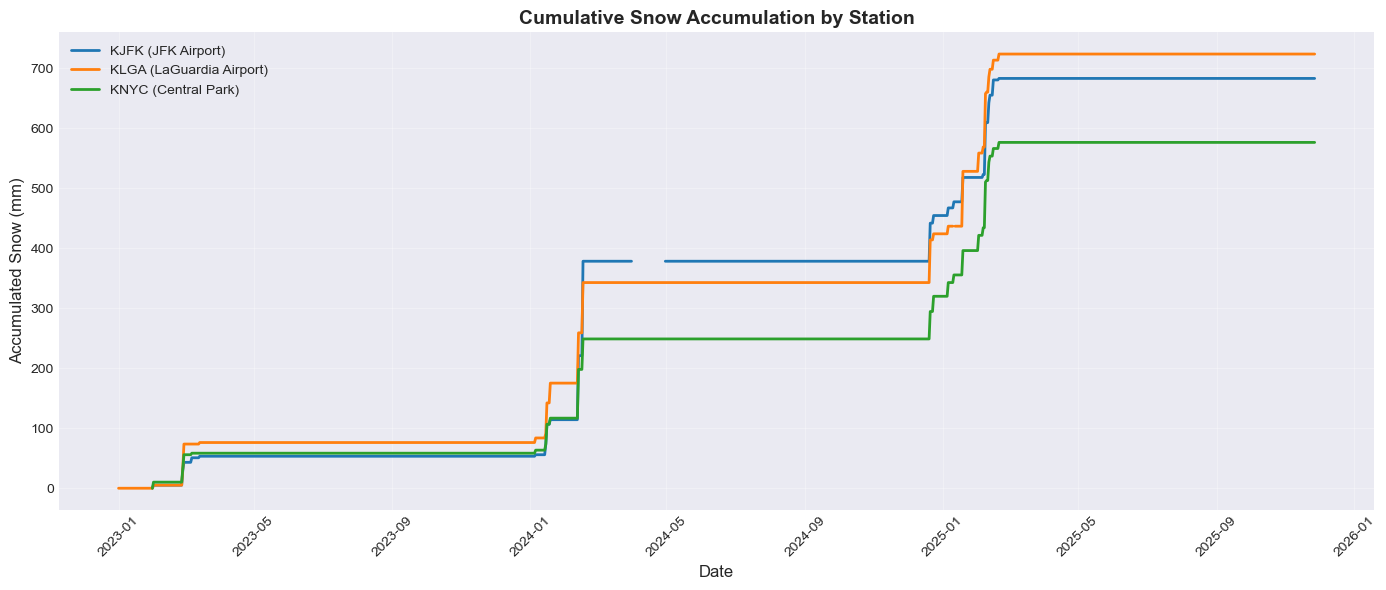

✓ Combined accumulation plot created


In [44]:
# Combined accumulation plot - all stations on one plot
if df_snow is not None and 'SNOW' in df_snow.columns:
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    
    # Plot cumulative snow accumulation for all stations
    for station in ['KJFK', 'KLGA', 'KNYC']:
        df_station = df_snow[df_snow['station_code'] == station].sort_values('DATE')
        snow_accum = df_station['SNOW'].cumsum()
        ax.plot(df_station['DATE'], snow_accum, label=f"{station} ({STATION_CODES.get(station)})", linewidth=2)
    
    ax.set_title('Cumulative Snow Accumulation by Station', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Accumulated Snow (mm)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Combined accumulation plot created")
else:
    print("df_snow not available")


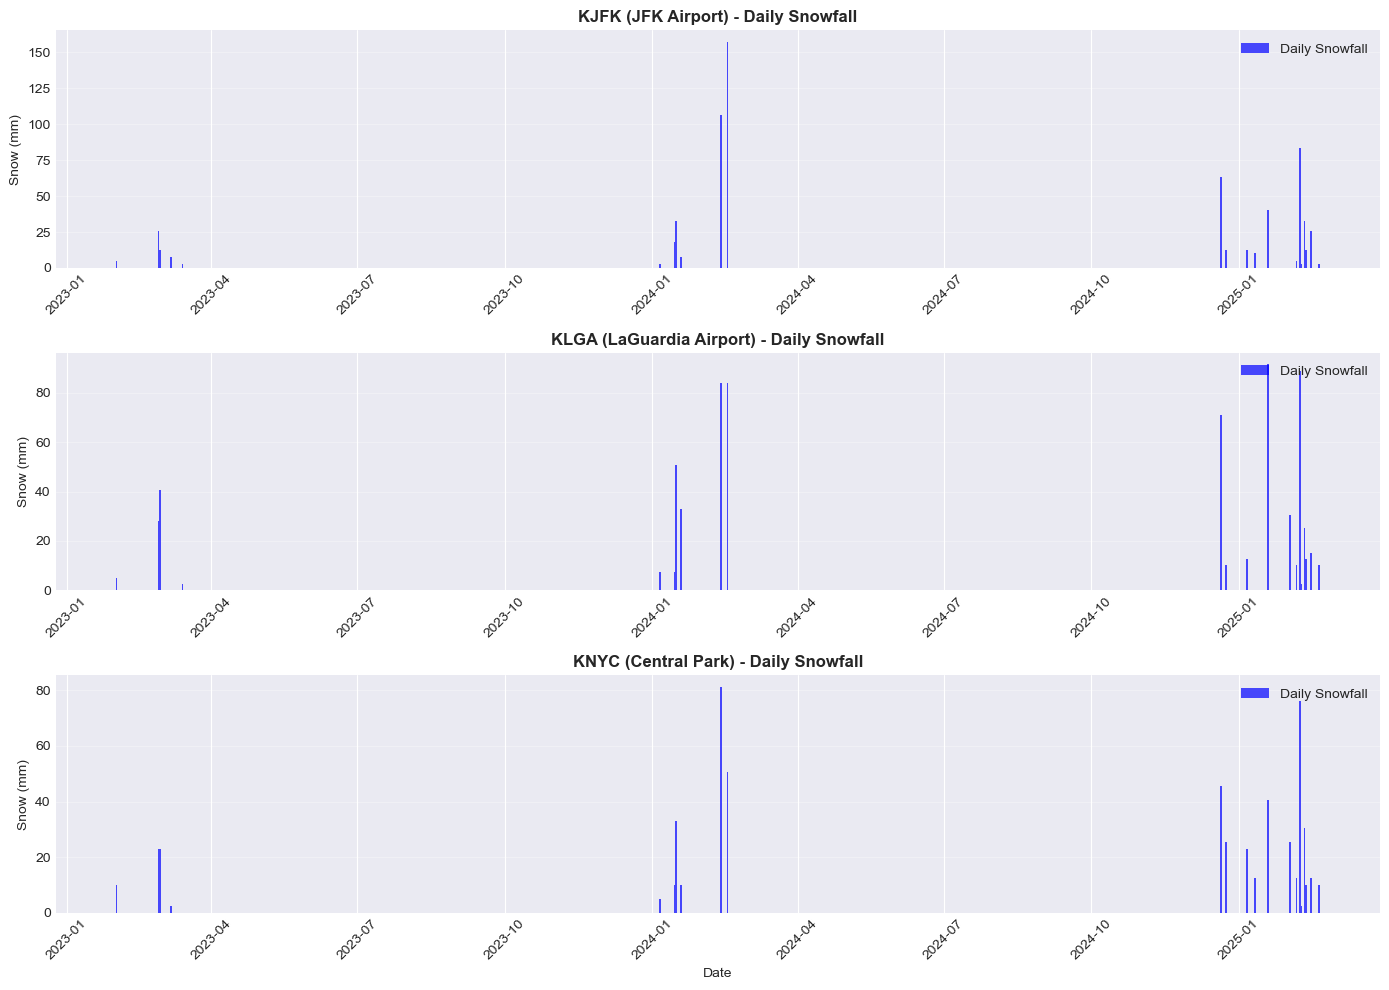

✓ Daily snowfall plots created


In [45]:
# Daily snowfall plot
if df_snow is not None and 'SNOW' in df_snow.columns:
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    
    for idx, station in enumerate(['KJFK', 'KLGA', 'KNYC']):
        df_station = df_snow[df_snow['station_code'] == station].sort_values('DATE')
        
        # Filter to days with snow only for clarity
        df_snow_days = df_station[df_station['SNOW'] > 0].copy()
        
        if len(df_snow_days) > 0:
            axes[idx].bar(df_snow_days['DATE'], df_snow_days['SNOW'], 
                         label='Daily Snowfall', alpha=0.7, width=1, color='blue')
        
        axes[idx].set_title(f'{station} ({STATION_CODES.get(station, station)}) - Daily Snowfall', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Snow (mm)', fontsize=10)
        axes[idx].grid(True, alpha=0.3, axis='y')
        axes[idx].legend(loc='upper right')
        axes[idx].tick_params(axis='x', rotation=45)
    
    axes[-1].set_xlabel('Date', fontsize=10)
    plt.tight_layout()
    plt.show()
    
    print("✓ Daily snowfall plots created")
else:
    print("df_snow not available")


,Date,Station,Snowfall (mm),Precipitation (mm),Snow Depth (mm),Min Temp (°C),Max Temp (°C),Avg Temp (°C),Avg Wind (m/s),"Wind Gust (2min, m/s)","Wind Gust (5sec, m/s)",Wind Dir (2min),Wind Dir (5sec),Rain Event,Rain Day?
0,2023-02-01,KJFK,5.08,0.508,0.00,-3.3,3.3,0.0,10.51,16.1,19.0,30.0,320.0,1,True
1,2023-02-27,KJFK,25.40,8.128,0.00,-0.6,6.1,3.3,12.08,25.1,31.1,110.0,100.0,11,True
2,2023-02-28,KJFK,12.70,7.366,50.80,0.0,3.3,1.1,11.41,23.9,29.1,50.0,50.0,11,True
3,2023-03-07,KJFK,7.62,2.032,0.00,0.0,8.9,5.6,20.58,36.9,47.0,330.0,340.0,15,True
4,2023-03-14,KJFK,2.54,2.032,0.00,0.6,3.9,2.8,23.04,33.1,46.1,310.0,300.0,19,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2025-02-09,KNYC,2.54,1.524,78.74,-1.1,2.2,NaN,4.92,14.1,28.0,310.0,300.0,265,True
64,2025-02-11,KNYC,30.48,3.048,30.48,-2.2,1.7,NaN,2.91,8.9,16.1,250.0,270.0,267,True
65,2025-02-12,KNYC,10.16,2.794,78.74,-0.6,2.2,NaN,8.50,18.1,29.1,60.0,50.0,267,True
66,2025-02-15,KNYC,12.70,7.874,0.00,-2.2,1.7,NaN,5.14,12.1,21.0,60.0,70.0,269,True


✓ Summary with Celsius temperatures (68 days with snow shown).


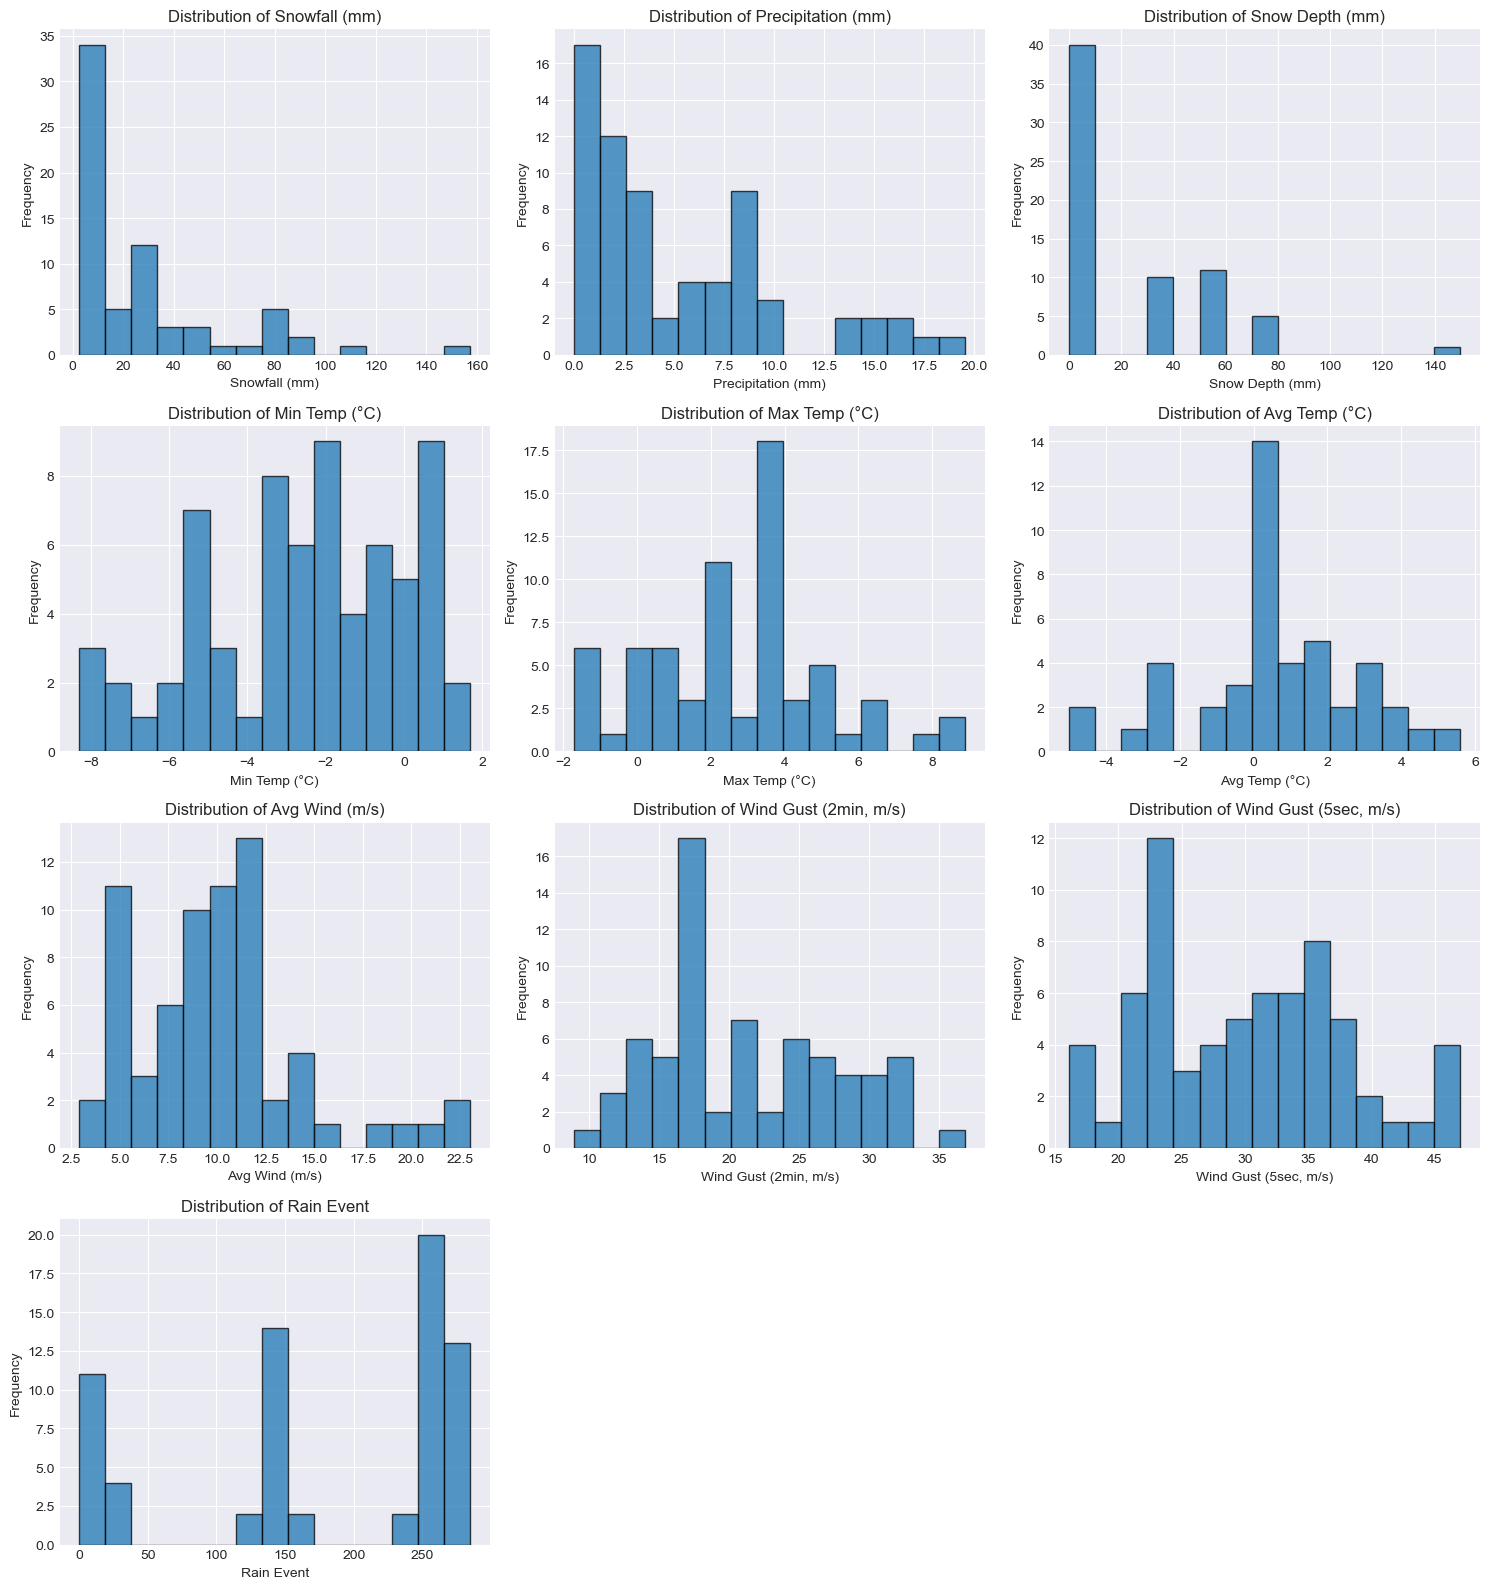

In [ ]:
## 9. Snowfall Day Characteristics Analysis

Analyze characteristics of snowfall days: precipitation, snow depth, and temperature parameters







### 9.1. Snowfall Day Data Summary

Extract and prepare data for days with snowfall


In [51]:
# Filter to days with snowfall and prepare data
if df_snow is not None and 'SNOW' in df_snow.columns:
    # Get all days with snow
    df_snowfall_days = df_snow[df_snow['SNOW'] > 0].copy()
    
    # Convert temperatures from Fahrenheit to Celsius
    temp_cols = ['TMIN', 'TMAX', 'TAVG']
    for col in temp_cols:
        if col in df_snowfall_days.columns:
            df_snowfall_days[f'{col}_C'] = ((df_snowfall_days[col] - 32) * 5.0 / 9.0).round(1)
    
    # Sort by date
    df_snowfall_days = df_snowfall_days.sort_values(['station_code', 'DATE']).reset_index(drop=True)
    
    print("="*60)
    print("SNOWFALL DAYS DATA SUMMARY")
    print("="*60)
    print(f"\nTotal snowfall days: {len(df_snowfall_days):,}")
    print(f"Stations: {', '.join(sorted(df_snowfall_days['station_code'].unique()))}")
    
    # Show breakdown by station
    for station in sorted(df_snowfall_days['station_code'].unique()):
        station_snow = df_snowfall_days[df_snowfall_days['station_code'] == station]
        print(f"\n{station}: {len(station_snow)} snowfall days")
        if len(station_snow) > 0:
            print(f"  Snow range: {station_snow['SNOW'].min():.1f} - {station_snow['SNOW'].max():.1f} mm")
            print(f"  Avg snow: {station_snow['SNOW'].mean():.1f} mm")
    
    print(f"\n✓ Snowfall days data prepared")
else:
    print("df_snow not available")
    df_snowfall_days = None


SNOWFALL DAYS DATA SUMMARY

Total snowfall days: 68
Stations: KJFK, KLGA, KNYC

KJFK: 23 snowfall days
  Snow range: 2.5 - 157.5 mm
  Avg snow: 29.7 mm

KLGA: 22 snowfall days
  Snow range: 2.5 - 91.4 mm
  Avg snow: 32.9 mm

KNYC: 23 snowfall days
  Snow range: 2.5 - 81.3 mm
  Avg snow: 25.1 mm

✓ Snowfall days data prepared


### 9.2. Histogram/Bar Charts of Snowfall Day Characteristics

Visualize key parameters for snowfall days: PRCP, SNWD, and temperature (min/max/avg)


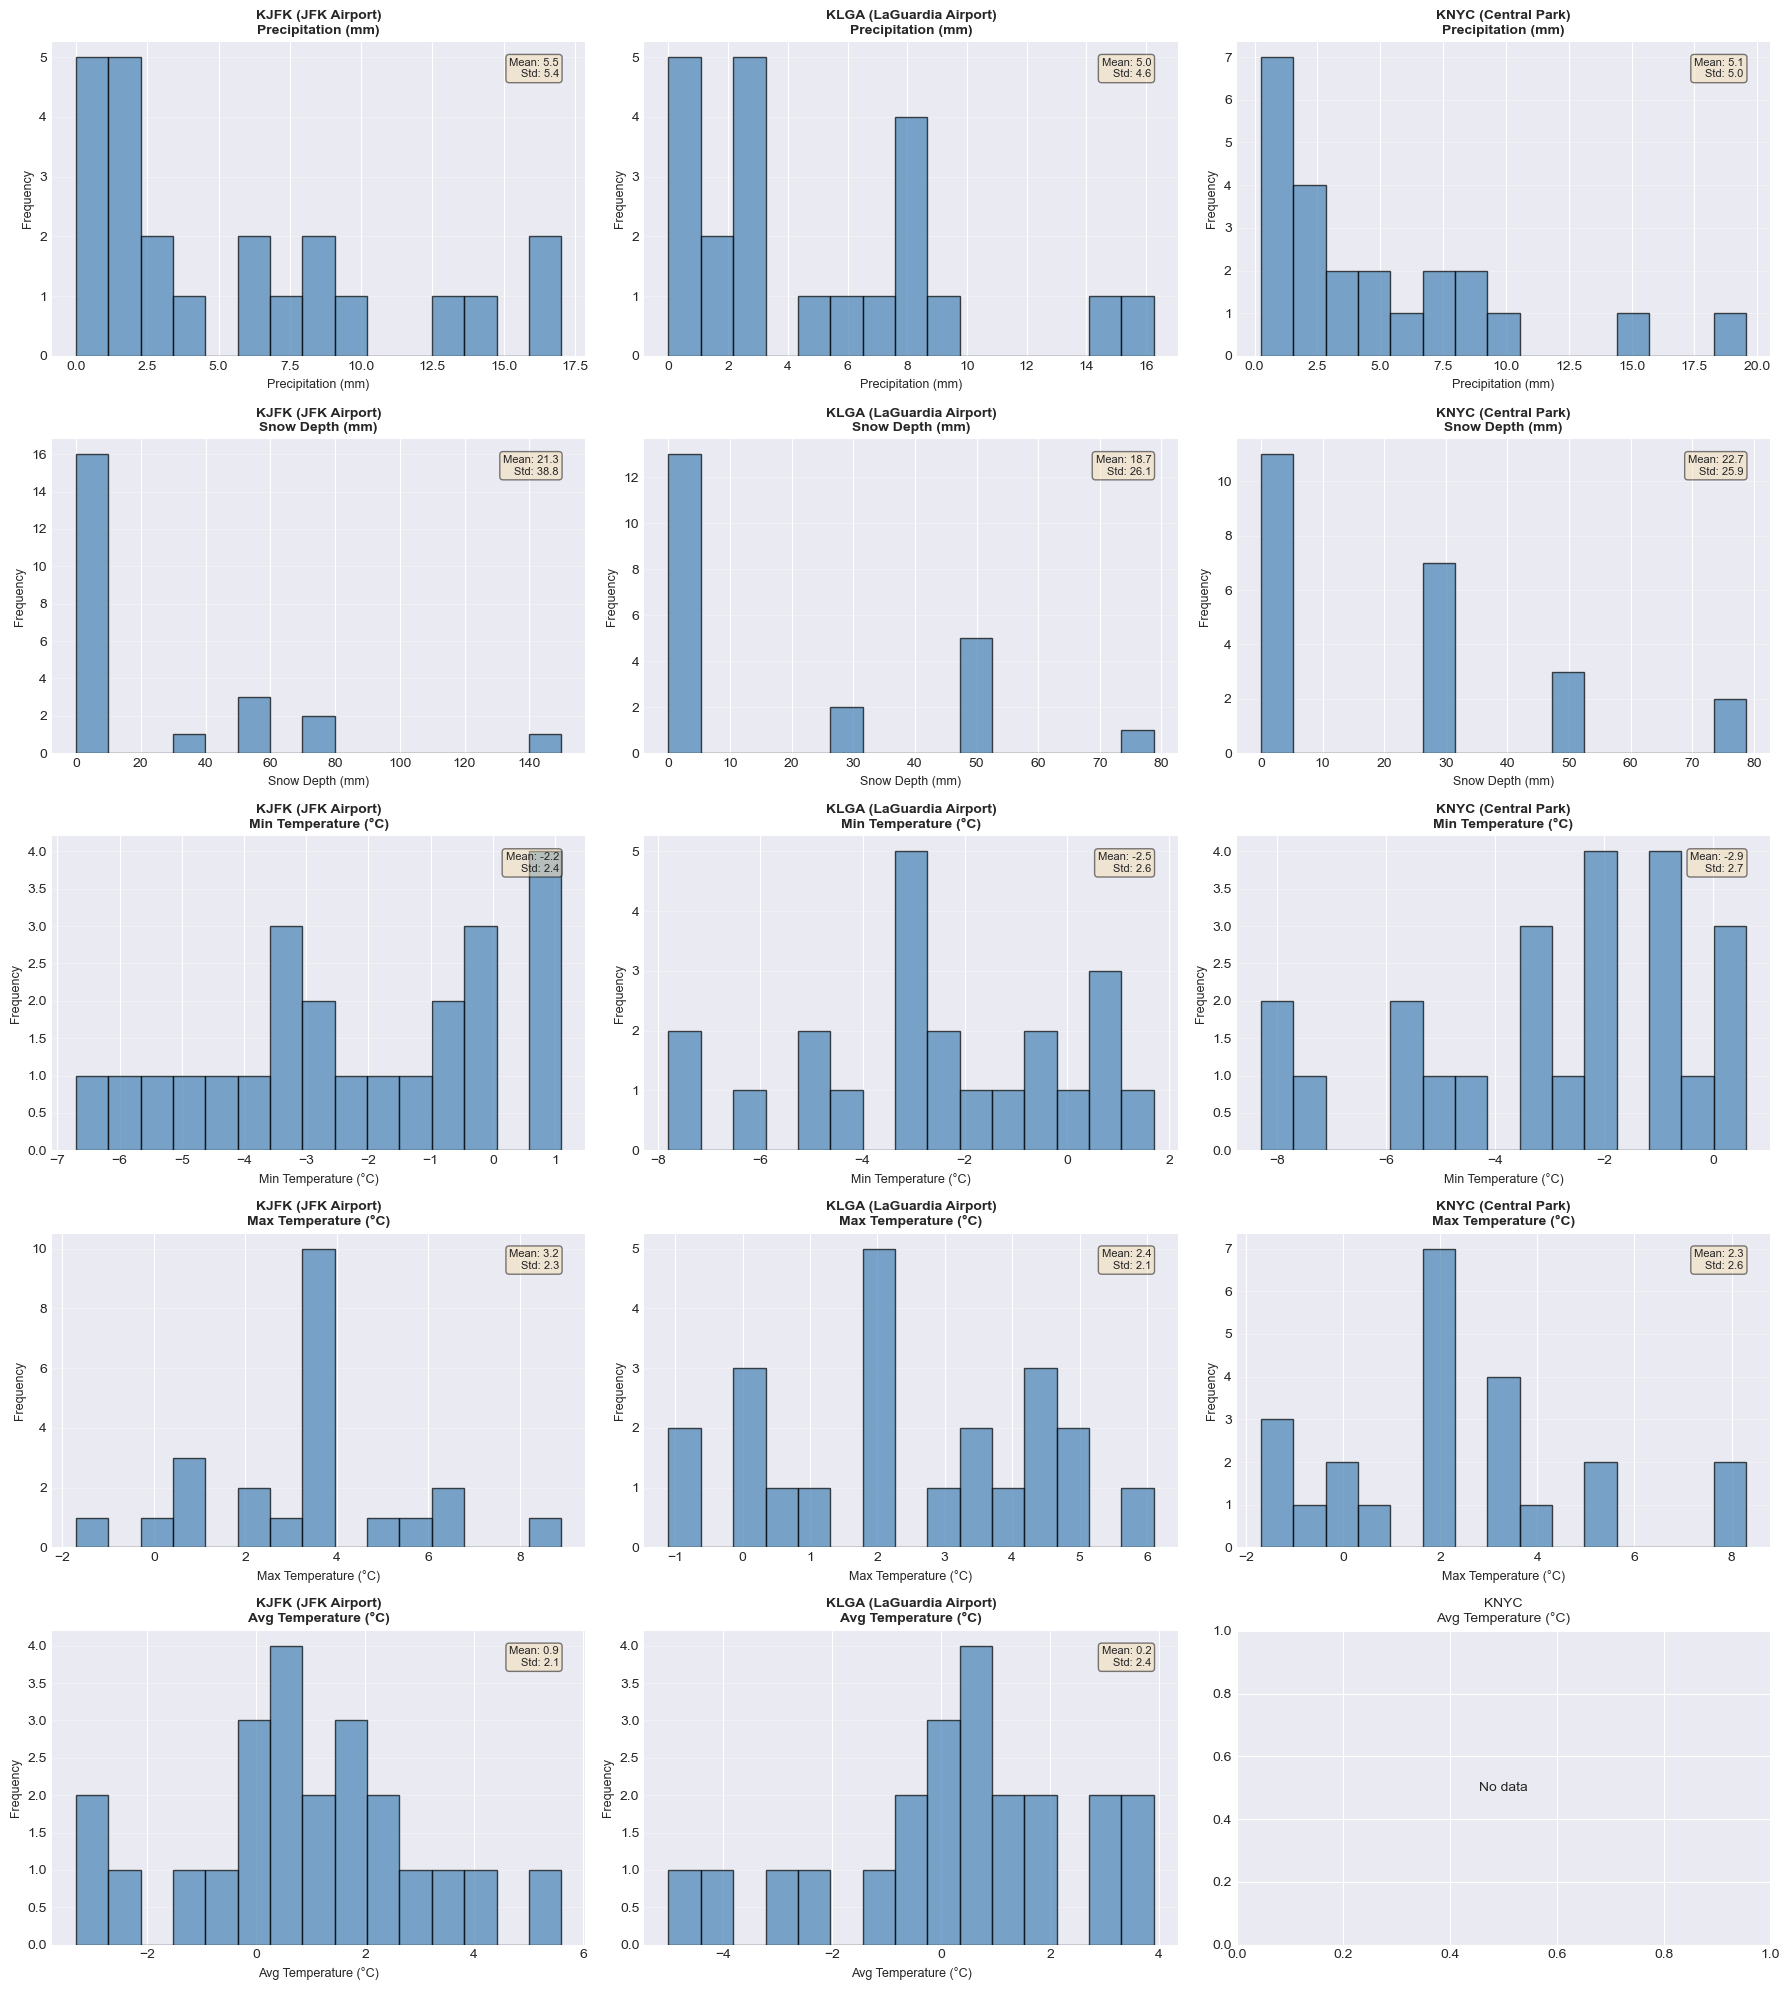

✓ Histogram charts created for snowfall day characteristics


In [52]:
# Create histogram/bar charts for snowfall day characteristics
if df_snowfall_days is not None and len(df_snowfall_days) > 0:
    STATION_CODES = {
        'KNYC': 'Central Park',
        'KJFK': 'JFK Airport',
        'KLGA': 'LaGuardia Airport'
    }
    
    # Parameters to visualize
    params = {
        'PRCP': 'Precipitation (mm)',
        'SNWD': 'Snow Depth (mm)',
        'TMIN_C': 'Min Temperature (°C)',
        'TMAX_C': 'Max Temperature (°C)',
        'TAVG_C': 'Avg Temperature (°C)'
    }
    
    # Create figure with subplots - one row per parameter, columns for each station
    n_params = len([p for p in params.keys() if p in df_snowfall_days.columns])
    stations = sorted(df_snowfall_days['station_code'].unique())
    n_stations = len(stations)
    
    fig, axes = plt.subplots(n_params, n_stations, figsize=(6*n_stations, 4*n_params))
    
    # Handle case where we have only one parameter or one station
    if n_params == 1:
        axes = axes.reshape(1, -1)
    if n_stations == 1:
        axes = axes.reshape(-1, 1)
    
    # Plot histograms for each parameter by station
    for param_idx, (param_col, param_name) in enumerate(params.items()):
        if param_col in df_snowfall_days.columns:
            for station_idx, station in enumerate(stations):
                ax = axes[param_idx, station_idx] if n_params > 1 else axes[station_idx]
                
                station_data = df_snowfall_days[df_snowfall_days['station_code'] == station]
                param_data = station_data[param_col].dropna()
                
                if len(param_data) > 0:
                    # Create histogram
                    ax.hist(param_data, bins=15, edgecolor='black', alpha=0.7, color='steelblue')
                    ax.set_title(f'{station} ({STATION_CODES.get(station, station)})\n{param_name}', 
                                fontsize=10, fontweight='bold')
                    ax.set_xlabel(param_name, fontsize=9)
                    ax.set_ylabel('Frequency', fontsize=9)
                    ax.grid(True, alpha=0.3, axis='y')
                    
                    # Add statistics text
                    stats_text = f'Mean: {param_data.mean():.1f}\nStd: {param_data.std():.1f}'
                    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
                           verticalalignment='top', horizontalalignment='right',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                           fontsize=8)
                else:
                    ax.text(0.5, 0.5, 'No data', transform=ax.transAxes,
                           ha='center', va='center')
                    ax.set_title(f'{station}\n{param_name}', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("✓ Histogram charts created for snowfall day characteristics")
else:
    print("No snowfall days data available for visualization")


### 9.3. Bar Charts per Snowfall Day

Show bar charts for each snowfall day with PRCP, SNWD, and temperature values


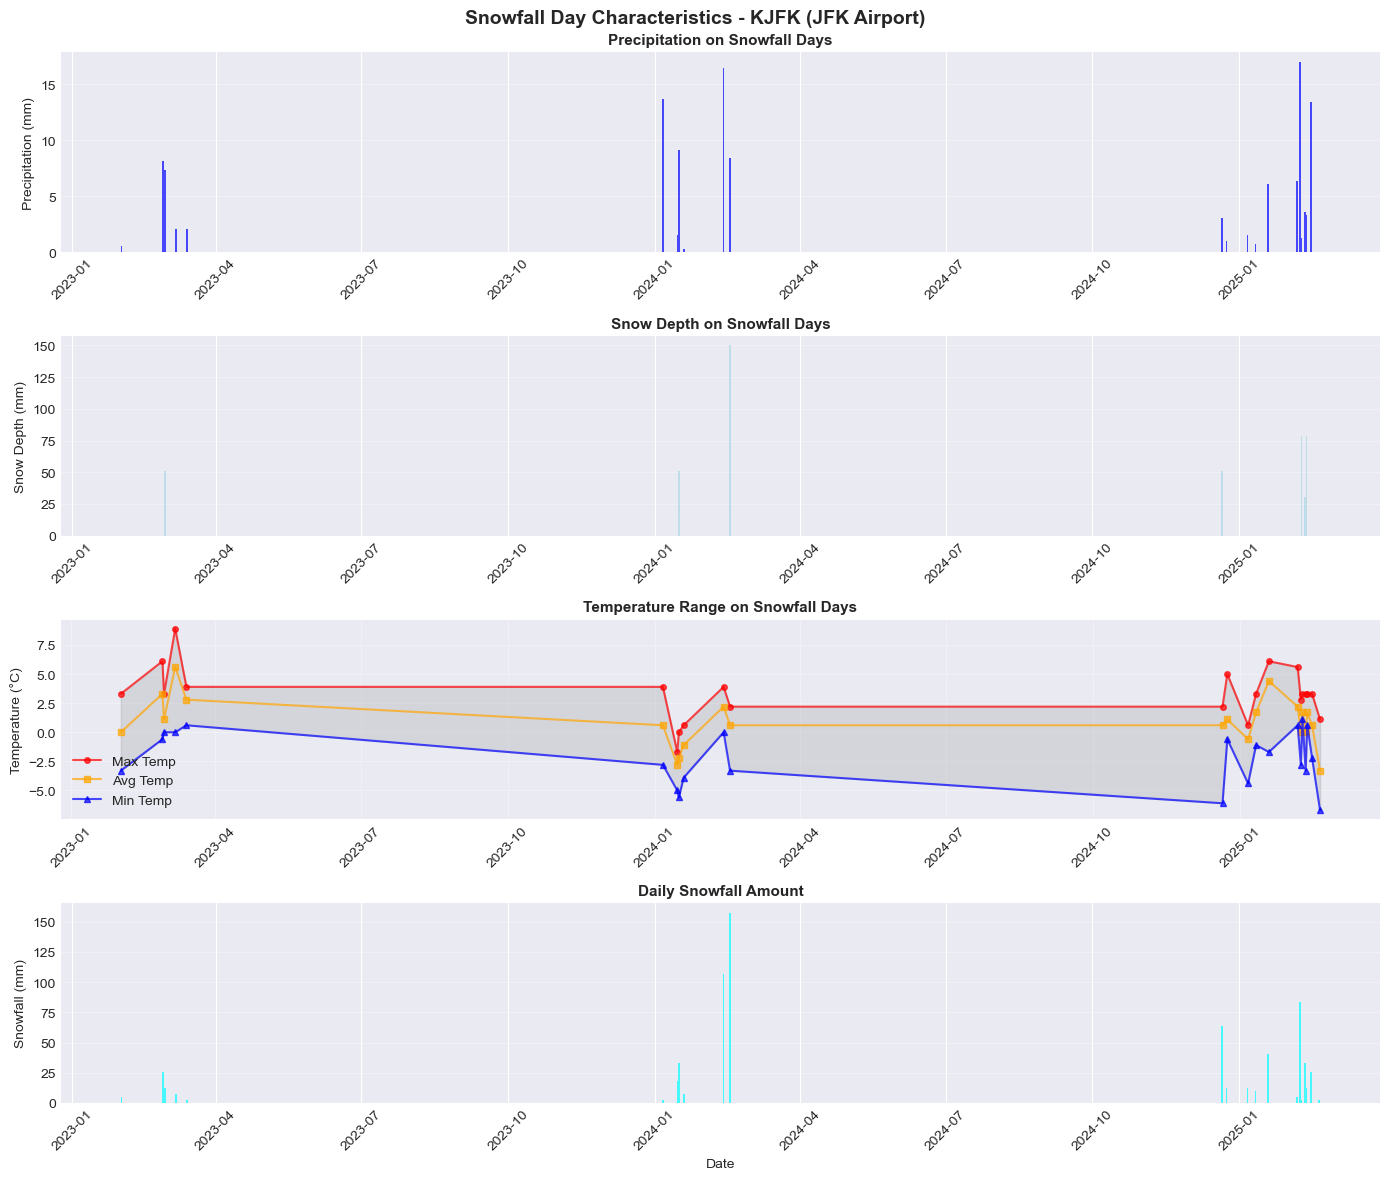

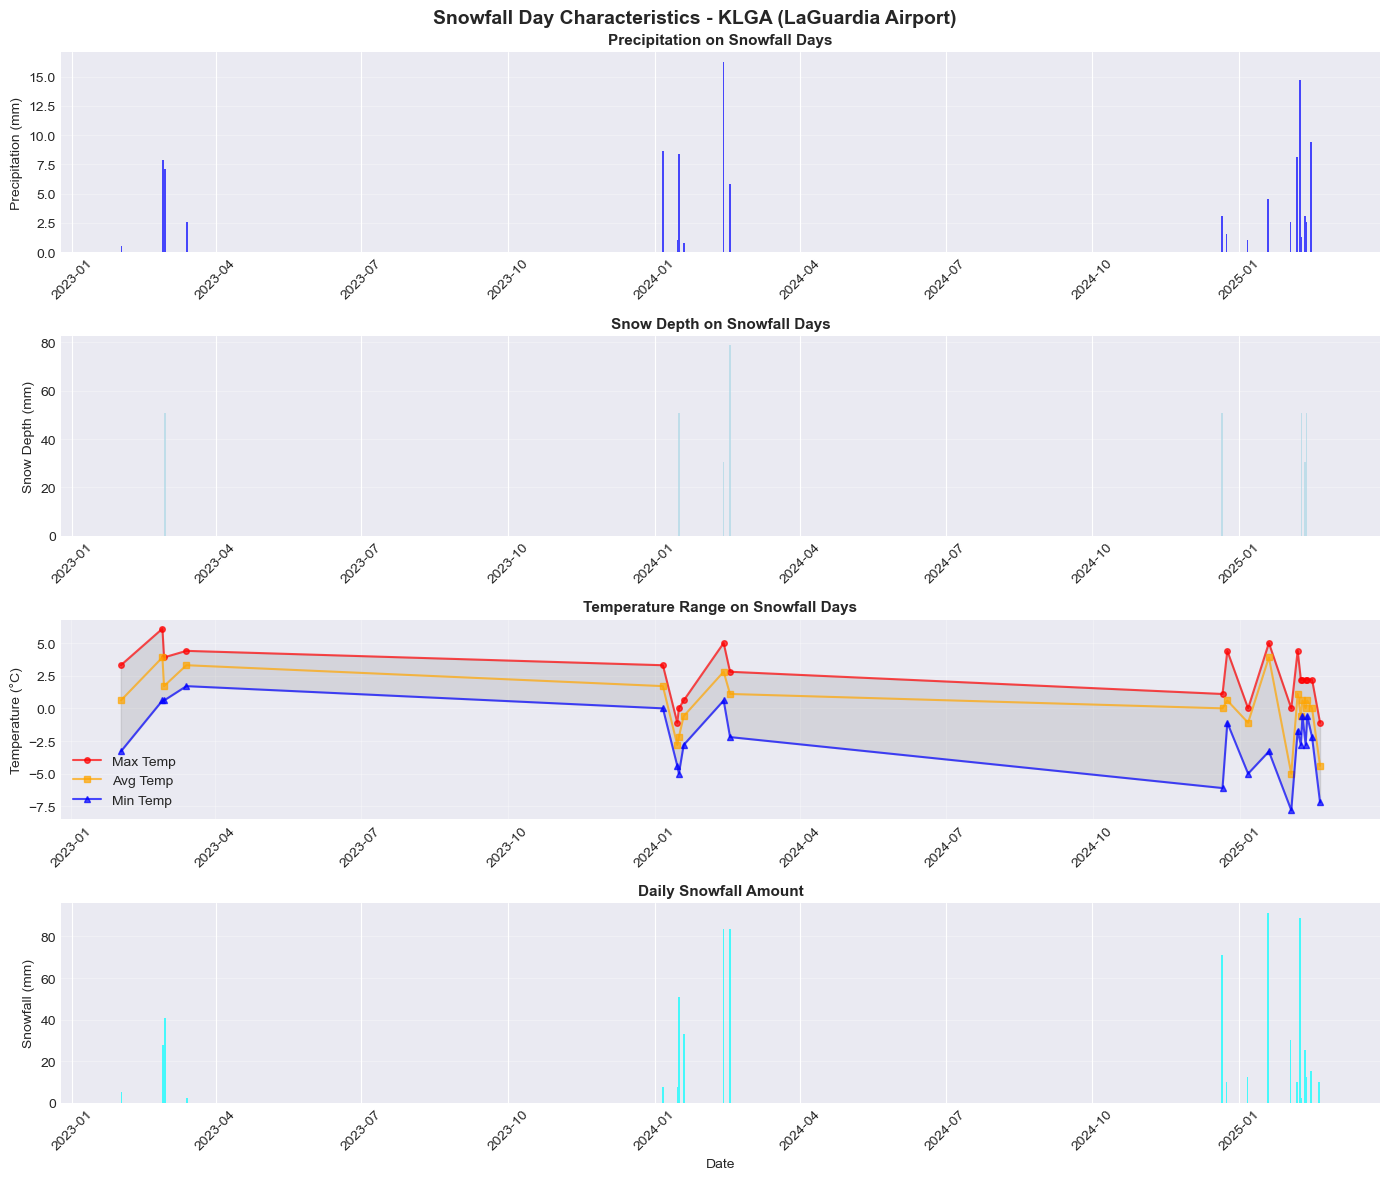

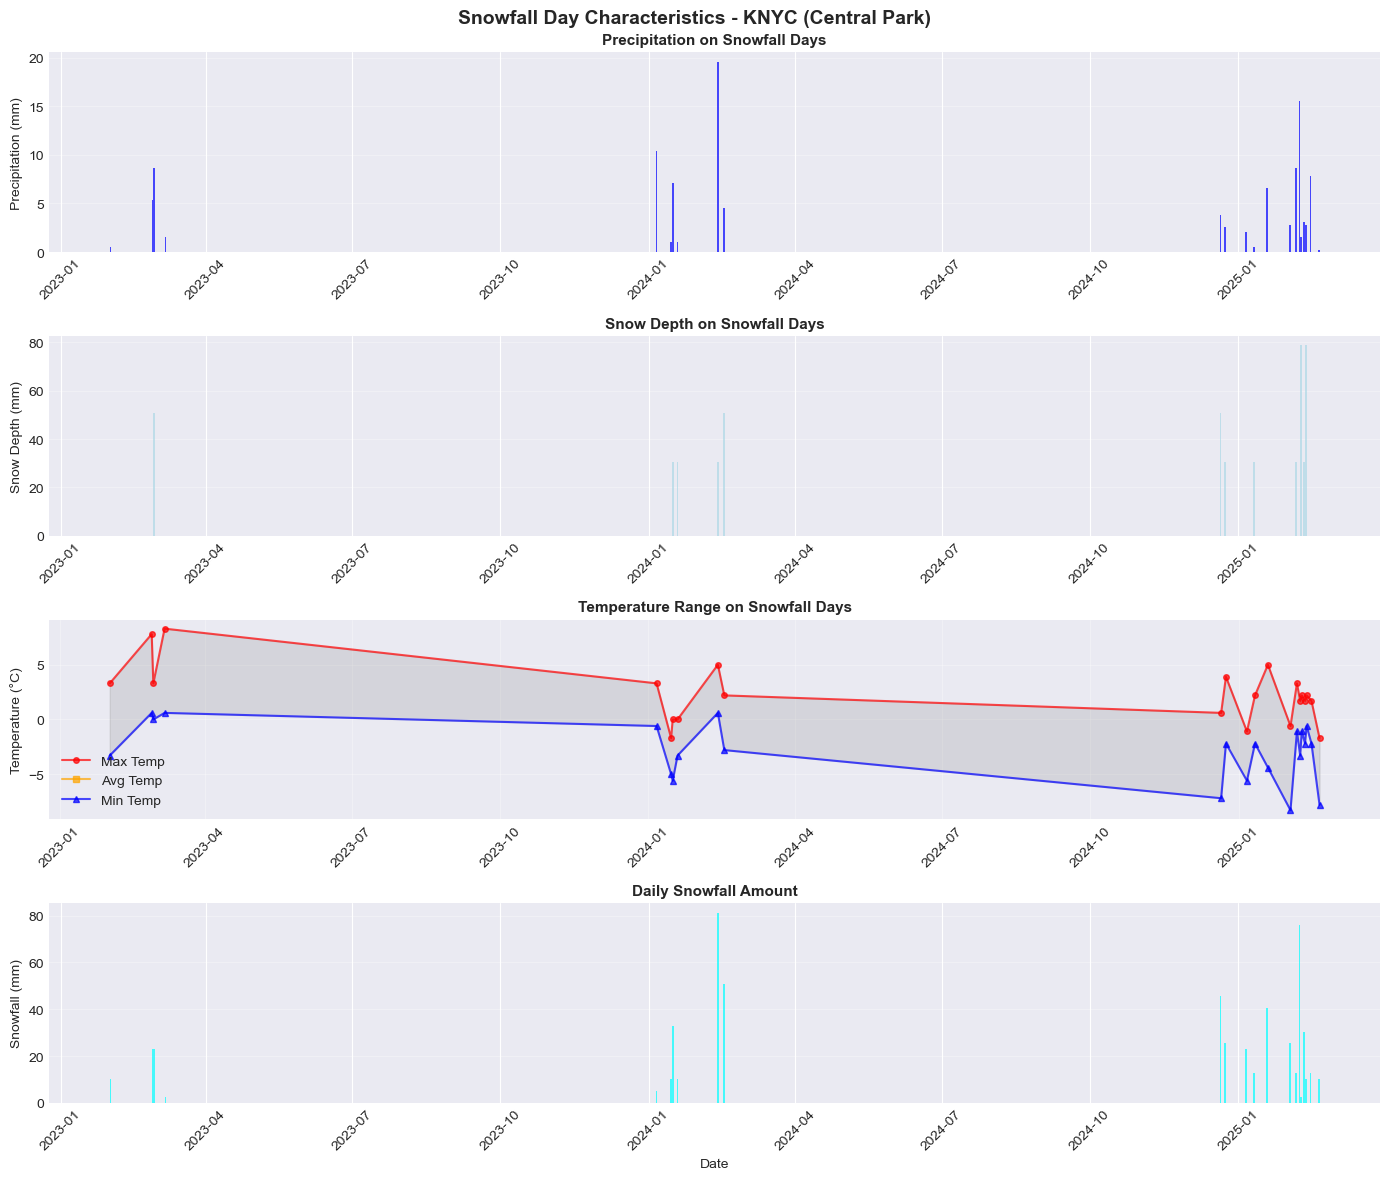

✓ Bar charts created for each snowfall day by station


In [ ]:
# Create bar charts showing characteristics per snowfall day - AVERAGED ACROSS STATIONS
if df_snowfall_days is not None and len(df_snowfall_days) > 0:
    # Average across all stations by date
    df_snowfall_days['DATE'] = pd.to_datetime(df_snowfall_days['DATE'])
    
    # Group by date and average across stations
    numeric_cols = ['SNOW', 'PRCP', 'SNWD', 'TMIN_C', 'TMAX_C', 'TAVG_C']
    available_cols = [col for col in numeric_cols if col in df_snowfall_days.columns]
    
    # Average by date
    df_avg = df_snowfall_days.groupby('DATE')[available_cols].mean().reset_index()
    df_avg = df_avg.sort_values('DATE').reset_index(drop=True)
    
    # Prepare data for bar chart
    dates = df_avg['DATE']
    
    # Create figure with multiple subplots
    fig, axes = plt.subplots(4, 1, figsize=(16, 14))
    fig.suptitle('Snowfall Day Characteristics - Averaged Across All Stations', 
                 fontsize=18, fontweight='bold', y=0.995)
    
    # Plot 1: Precipitation (PRCP)
    if 'PRCP' in df_avg.columns:
        prcp_data = df_avg['PRCP'].fillna(0)
        axes[0].bar(dates, prcp_data, alpha=0.7, color='blue', width=1)
        axes[0].set_ylabel('Precipitation (mm)', fontsize=16, fontweight='bold')
        axes[0].set_title('Precipitation on Snowfall Days', fontsize=14, fontweight='bold')
        axes[0].grid(True, alpha=0.3, axis='y')
        axes[0].tick_params(axis='x', rotation=45, labelsize=12)
        axes[0].tick_params(axis='y', labelsize=12)
    
    # Plot 2: Snow Depth (SNWD)
    if 'SNWD' in df_avg.columns:
        snwd_data = df_avg['SNWD'].fillna(0)
        axes[1].bar(dates, snwd_data, alpha=0.7, color='lightblue', width=1)
        axes[1].set_ylabel('Snow Depth (mm)', fontsize=16, fontweight='bold')
        axes[1].set_title('Snow Depth on Snowfall Days', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='y')
        axes[1].tick_params(axis='x', rotation=45, labelsize=12)
        axes[1].tick_params(axis='y', labelsize=12)
    
    # Plot 3: Temperature range (Min, Max, Avg)
    if all(col in df_avg.columns for col in ['TMIN_C', 'TMAX_C', 'TAVG_C']):
        axes[2].plot(dates, df_avg['TMAX_C'], 'o-', label='Max Temp', color='red', alpha=0.7, markersize=5, linewidth=2)
        axes[2].plot(dates, df_avg['TAVG_C'], 's-', label='Avg Temp', color='orange', alpha=0.7, markersize=5, linewidth=2)
        axes[2].plot(dates, df_avg['TMIN_C'], '^-', label='Min Temp', color='blue', alpha=0.7, markersize=5, linewidth=2)
        axes[2].fill_between(dates, df_avg['TMIN_C'], df_avg['TMAX_C'], alpha=0.2, color='gray')
        axes[2].set_ylabel('Temperature (°C)', fontsize=16, fontweight='bold')
        axes[2].set_title('Temperature Range on Snowfall Days', fontsize=14, fontweight='bold')
        axes[2].legend(loc='best', fontsize=12)
        axes[2].grid(True, alpha=0.3)
        axes[2].tick_params(axis='x', rotation=45, labelsize=12)
        axes[2].tick_params(axis='y', labelsize=12)
    
    # Plot 4: Snowfall amount
    if 'SNOW' in df_avg.columns:
        snow_data = df_avg['SNOW']
        axes[3].bar(dates, snow_data, alpha=0.7, color='cyan', width=1)
        axes[3].set_ylabel('Snowfall (mm)', fontsize=16, fontweight='bold')
        axes[3].set_xlabel('Date', fontsize=16, fontweight='bold')
        axes[3].set_title('Daily Snowfall Amount', fontsize=14, fontweight='bold')
        axes[3].grid(True, alpha=0.3, axis='y')
        axes[3].tick_params(axis='x', rotation=45, labelsize=12)
        axes[3].tick_params(axis='y', labelsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✓ Bar charts created for each snowfall day (averaged across all stations)")
    print(f"  Total unique snowfall days: {len(df_avg)}")
else:
    print("No snowfall days data available")


In [61]:
# Create a clean summary dataframe of snowfall days
if df_snowfall_days is not None and len(df_snowfall_days) > 0:
    # Select relevant columns
    summary_cols = ['DATE', 'station_code', 'SNOW', 'PRCP', 'SNWD']
    
    # Add temperature columns (use Celsius if available, otherwise original)
    temp_cols = []
    if 'TMIN_C' in df_snowfall_days.columns:
        temp_cols = ['TMIN_C', 'TMAX_C', 'TAVG_C']
        temp_labels = ['Min Temp (°C)', 'Max Temp (°C)', 'Avg Temp (°C)']
    elif 'TMIN' in df_snowfall_days.columns:
        temp_cols = ['TMIN', 'TMAX', 'TAVG']
        temp_labels = ['Min Temp (°F)', 'Max Temp (°F)', 'Avg Temp (°F)']
    
    # Build column list
    cols_to_keep = summary_cols + temp_cols
    cols_to_keep = [col for col in cols_to_keep if col in df_snowfall_days.columns]
    
    # Create summary dataframe
    df_snowfall_summary = df_snowfall_days[cols_to_keep].copy()
    
    # Rename columns for readability
    rename_dict = {
        'DATE': 'Date',
        'station_code': 'Station',
        'SNOW': 'Snowfall (mm)',
        'PRCP': 'Precipitation (mm)',
        'SNWD': 'Snow Depth (mm)'
    }
    
    if 'TMIN_C' in df_snowfall_summary.columns:
        rename_dict.update({
            'TMIN_C': 'Min Temp (°C)',
            'TMAX_C': 'Max Temp (°C)',
            'TAVG_C': 'Avg Temp (°C)'
        })
    elif 'TMIN' in df_snowfall_summary.columns:
        rename_dict.update({
            'TMIN': 'Min Temp (°F)',
            'TMAX': 'Max Temp (°F)',
            'TAVG': 'Avg Temp (°F)'
        })
    
    df_snowfall_summary = df_snowfall_summary.rename(columns=rename_dict)
    
    # Sort by date and station
    df_snowfall_summary = df_snowfall_summary.sort_values(['Station', 'Date']).reset_index(drop=True)
    
    print("="*60)
    print("SNOWFALL DAYS SUMMARY DATAFRAME")
    print("="*60)
    print(f"\nTotal snowfall days: {len(df_snowfall_summary):,}")
    print(f"\nFirst 20 rows:")
    print(df_snowfall_summary.head(20).to_string(index=False))
    
    print(f"\n\nSummary Statistics:")
    numeric_cols = df_snowfall_summary.select_dtypes(include=[np.number]).columns
    print(df_snowfall_summary[numeric_cols].describe().round(2))
    
    print(f"\n✓ Summary dataframe created with {len(df_snowfall_summary)} snowfall days")
else:
    print("No snowfall days data available")
    df_snowfall_summary = None


SNOWFALL DAYS SUMMARY DATAFRAME

Total snowfall days: 68

First 20 rows:
      Date Station  Snowfall (mm)  Precipitation (mm)  Snow Depth (mm)  Min Temp (°C)  Max Temp (°C)  Avg Temp (°C)
2023-02-01    KJFK           5.08               0.508             0.00           -3.3            3.3            0.0
2023-02-27    KJFK          25.40               8.128             0.00           -0.6            6.1            3.3
2023-02-28    KJFK          12.70               7.366            50.80            0.0            3.3            1.1
2023-03-07    KJFK           7.62               2.032             0.00            0.0            8.9            5.6
2023-03-14    KJFK           2.54               2.032             0.00            0.6            3.9            2.8
2024-01-06    KJFK           2.54              13.716             0.00           -2.8            3.9            0.6
2024-01-15    KJFK          17.78               1.524             0.00           -5.0           -1.7           -2.8

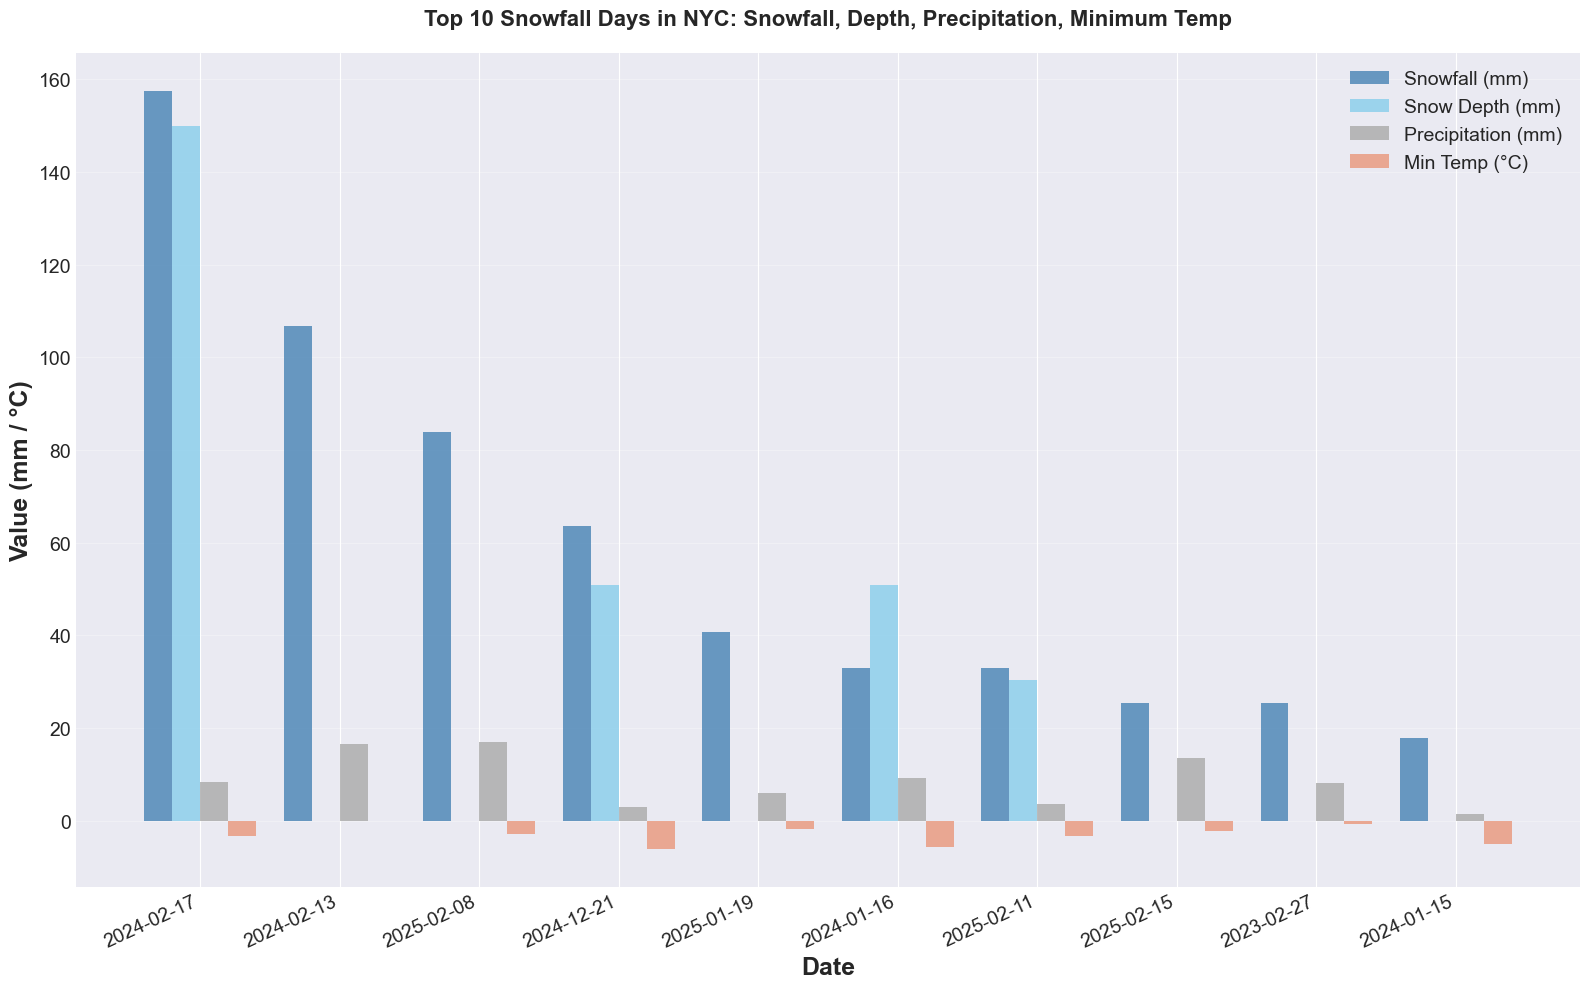

In [66]:

import matplotlib.pyplot as plt
import numpy as np

# Filter for NYC station (e.g. KJFK, use your actual NYC code if different)
df_nyc = df_snowfall_summary[df_snowfall_summary['Station'] == 'KJFK']

# Select the top 10 days with highest snowfall
df_top10 = df_nyc.sort_values('Snowfall (mm)', ascending=False).head(10).copy()

# Sort by snowfall (descending), but display bars from greatest to least
df_top10 = df_top10.sort_values('Snowfall (mm)', ascending=False)
dates = df_top10['Date'].astype(str).values

# Prepare values
snowfall = df_top10['Snowfall (mm)'].values
snowdepth = df_top10['Snow Depth (mm)'].values
precip = df_top10['Precipitation (mm)'].values
if 'Min Temp (°C)' in df_top10.columns:
    mintemp = df_top10['Min Temp (°C)'].values
    temp_unit = "°C"
elif 'Min Temp (°F)' in df_top10.columns:
    mintemp = df_top10['Min Temp (°F)'].values
    temp_unit = "°F"
else:
    mintemp = None  # Hide this bar

# Set positions for clustered bars
n = len(df_top10)
indices = np.arange(n)
bar_width = 0.20

# Create single clustered bar chart
plt.figure(figsize=(16, 10))

# Bar 1: Snowfall
plt.bar(indices, snowfall, bar_width, label='Snowfall (mm)', color='#4682B4', alpha=0.8)
# Bar 2: Snow Depth
plt.bar(indices + bar_width, snowdepth, bar_width, label='Snow Depth (mm)', color='#87CEEB', alpha=0.8)
# Bar 3: Precipitation
plt.bar(indices + 2*bar_width, precip, bar_width, label='Precipitation (mm)', color='#A9A9A9', alpha=0.8)
# Bar 4: Minimum Temp
if mintemp is not None:
    plt.bar(indices + 3*bar_width, mintemp, bar_width, label=f'Min Temp ({temp_unit})', color='#E9967A', alpha=0.8)

# Formatting with larger fonts and clear units
plt.xlabel('Date', fontsize=18, fontweight='bold')
plt.ylabel('Value (mm / °C)', fontsize=18, fontweight='bold')
plt.title('Top 10 Snowfall Days in NYC: Snowfall, Depth, Precipitation, Minimum Temp', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(indices + 1.5*bar_width, dates, rotation=25, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
